# Run 'stockread.py' once every weekday. 
## It may take up to an hour to download data 
## (depending on net speed)

In [ ]:
import sys
!python3 stockreader.py

Log file name : ./logs/log_2020-Mar-06-23-14-04.txt
Wait! Download in progress ... this may take a while
-- Downloading stocks list!
-- Done!
-- Downloading latest End of Day pricing data ...
-- Processing ... ZTS-- Done!
-- Downloading fundamental company data ...


# Import stockdatalib

In [1]:
import stockdatalib as sd

# Must set the data subdirectory

In [2]:
# Set the data directory and the stock name
sd.set_data_directory('./data/')

# Load Data and plot a stock

In [3]:
# Load S&P Stock list
stock_count, stock_fields, sp_df = sd.GetSP500_List()

In [4]:
# Set stock symbol
mystock = 'MSFT'
sd.set_stock(mystock)

In [5]:
stock_info = sd.get_stock_info(mystock)
# Get stock company information
company_name = stock_info['name'][0]
company_sector = stock_info['sector'][0]
print(stock_info)

{'stock': ['msft'], 'name': ['Microsoft Corp.'], 'sector': ['Information Technology']}


In [6]:
# Get latest price quote
print(sd.quote(mystock))

  symbol                date   close    volume
0   MSFT 2020-03-05 21:00:01  166.27  40314344


In [7]:
# Get latest key stats on the stock
sd.key_stat(mystock)

,symbol,Date,No. of Shares,Revenue,Earning before Tax,PE Ratio,Earning per Share,Net Income,Free Cash Flow Margin,Gross Profit,Free Cash Flow per Share
0,MSFT,2019-12-31,7.628000e+09,3.690600e+10,1.408500e+10,25.9384,1.53,1.164900e+10,0.191161,2.454800e+10,0.675


<Figure size 1080x432 with 0 Axes>

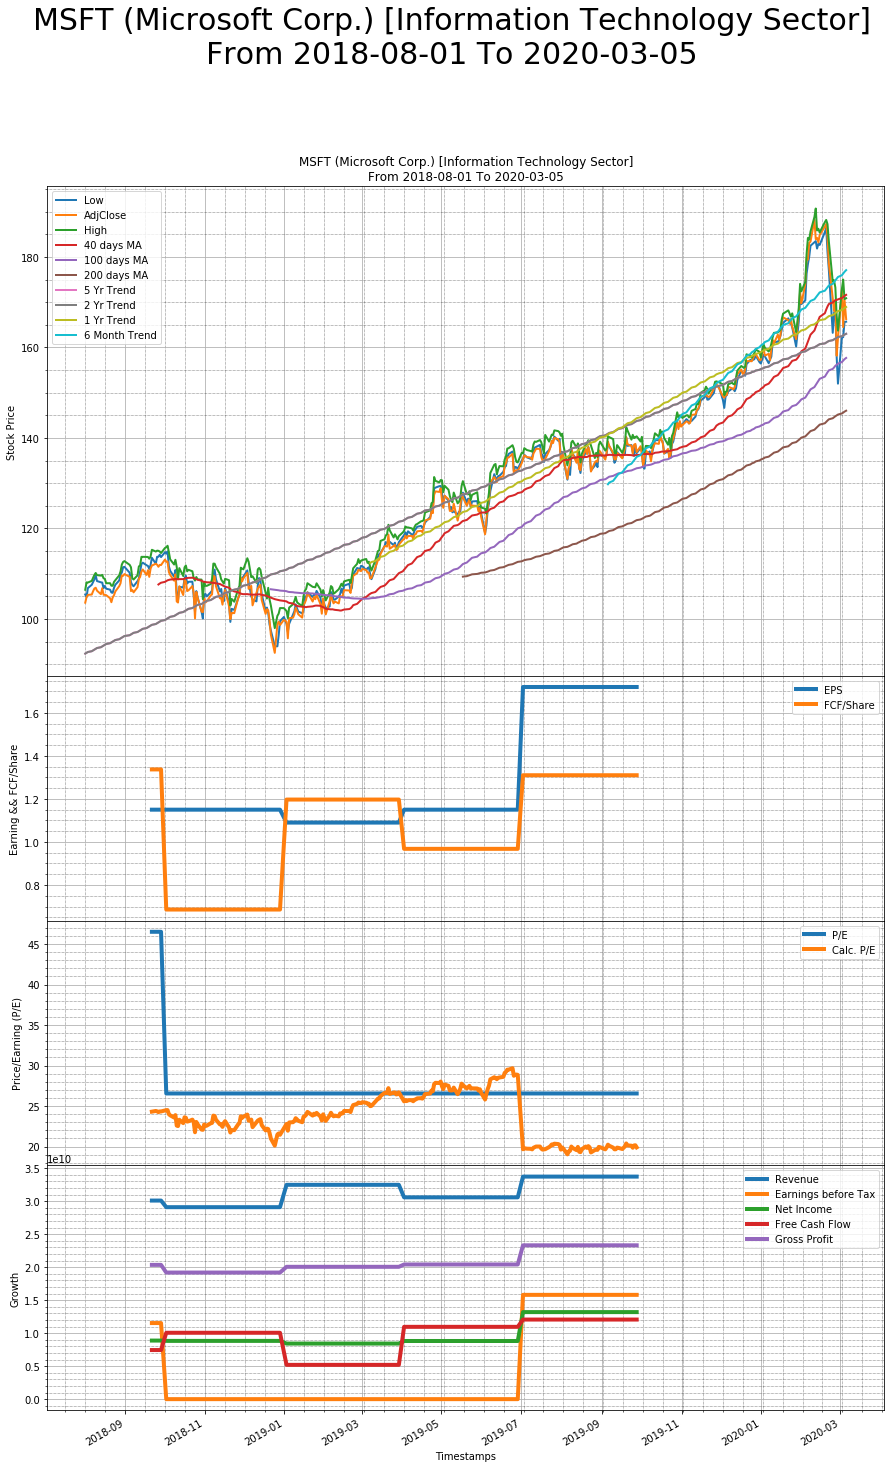

In [8]:
# Plot stock basic charts
price_df = sd.GetStockDataFrame(mystock)
price_df = sd.DatesRange(price_df, '2018-08-01') # limit the data since a specific past date or a range

linear_trends = sd.plot_basic_charts(mystock,price_df)

In [9]:
# Linear Regression Equations returned by the plot call
linear_trends

,5 Years Trend Line Function,2 Years Trend Line Function,1 Year Trend Line Function,6 Months Trend Line Function
0,0.1767 x + 92.35,0.1767 x + 92.35,0.2254 x + 112.4,0.3785 x + 129.8


In [10]:
# Get last price quote
sd.quote('csco')

,symbol,date,close,volume
0,csco,2020-03-05 21:00:01,39.57,30255898


In [13]:
# Get last key stats on the stock
print(sd.quote('ibm'))
sd.key_stat('ibm')

  symbol                date   close   volume
0    ibm 2020-03-05 21:01:11  129.55  5269190


,symbol,Date,No. of Shares,Revenue,Earning before Tax,PE Ratio,Earning per Share,Net Income,Free Cash Flow Margin,Gross Profit,Free Cash Flow per Share
0,ibm,2019-09-30,887291199.0,1.802800e+10,1.522000e+09,16.7728,1.88,1.672000e+09,0.168127,8.335000e+09,3.597


,5 Years Trend Line Function,2 Years Trend Line Function,1 Year Trend Line Function,6 Months Trend Line Function
0,0.0265 x + 125.9,0.0265 x + 125.9,0.02817 x + 132,0.04277 x + 134.6


<Figure size 1080x432 with 0 Axes>

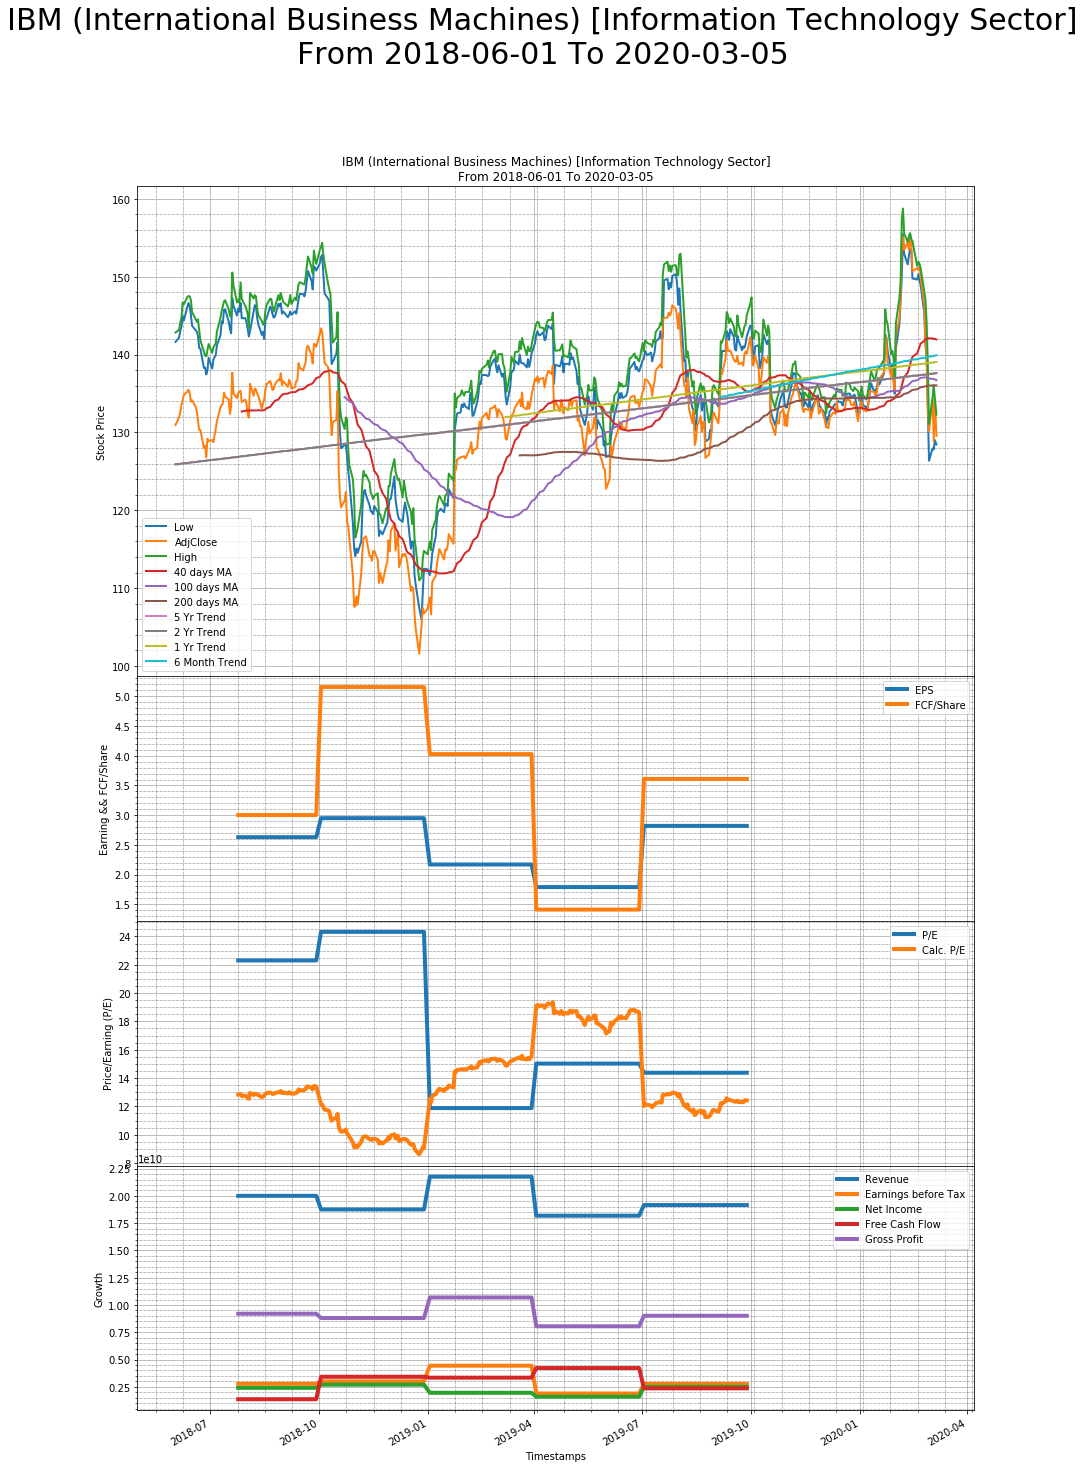

In [14]:
# Plot another stock
price_df = sd.GetStockDataFrame(sd.get_stock())
price_df_test = sd.DatesRange(price_df, '2018-06-01')
sd.plot_basic_charts(sd.get_stock(),price_df_test)

# The data load functions

In [15]:
# Load stock End of Day prices file
price_df = sd.GetStockDataFrame('msft')

# Load the stock fundamental data
keys, column_map, main_df_org = sd.GetFund_Dict('msft')

# Searching for data by column name

In [16]:
# Search for a key word in the data column names
table,text = sd.FindColumn('Revenue')
table

,column_name,DataFrame
0,Revenue,income-statement
1,Revenue Growth,income-statement
2,Cost of Revenue,income-statement
3,Deferred revenue,balance-sheet-statement
4,Revenue per Share,company-key-metrics
5,SG&A to Revenue,company-key-metrics
6,R&D to Revenue,company-key-metrics
7,Capex to Revenue,company-key-metrics
8,Stock-based compensation to Revenue,company-key-metrics
9,profitabilityIndicatorRatios_eBITperRevenue,financial-ratios


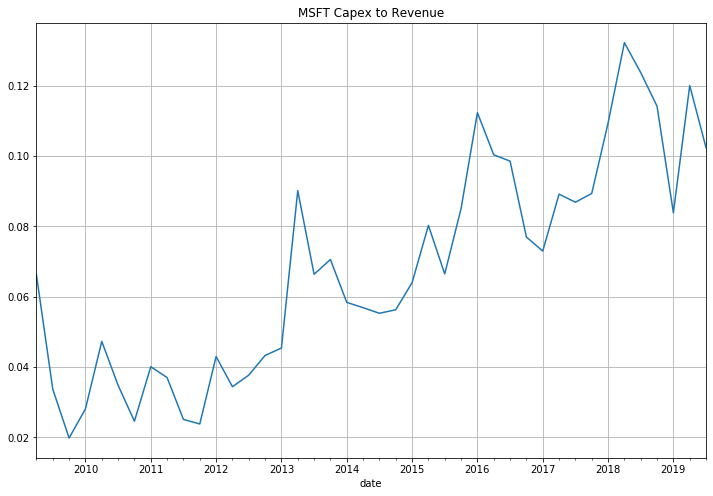

In [17]:
# Now we know where 'Capex to Revenue' is, we can load it from the DataFrame source 'company-key-metrics' as 
# the code below
main_df_org['company-key-metrics']['Capex to Revenue'].plot(figsize=(12,8),
                                                            grid=True, 
                                                            title=sd.get_stock().upper()+' Capex to Revenue')

# Selecting data range from price data frame

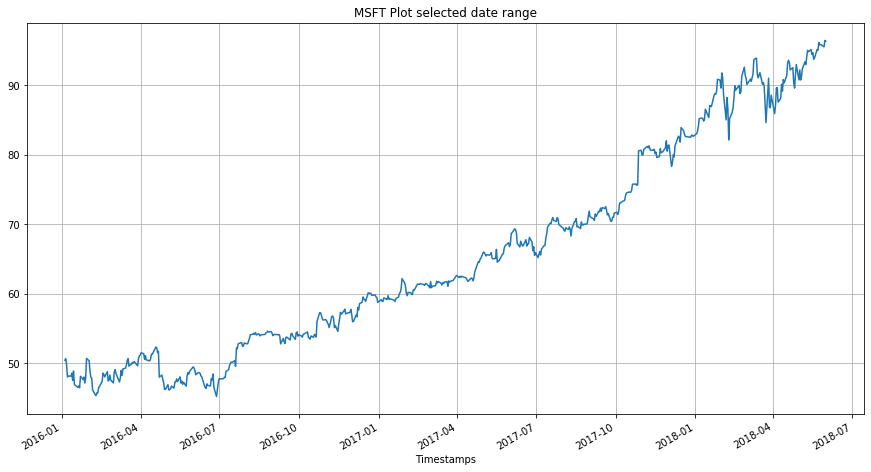

In [18]:
# Limit the stock prices data in the dates range
price_df = sd.DatesRange(price_df, '2016-01-01', '2018-06-01')

# Plot the prices chart
ax1 = price_df['AdjClose'].plot(figsize=(15,8),
                                title=sd.get_stock().upper()+" Plot selected date range").grid()

# Merging DataFrames from multiple sources into one DF

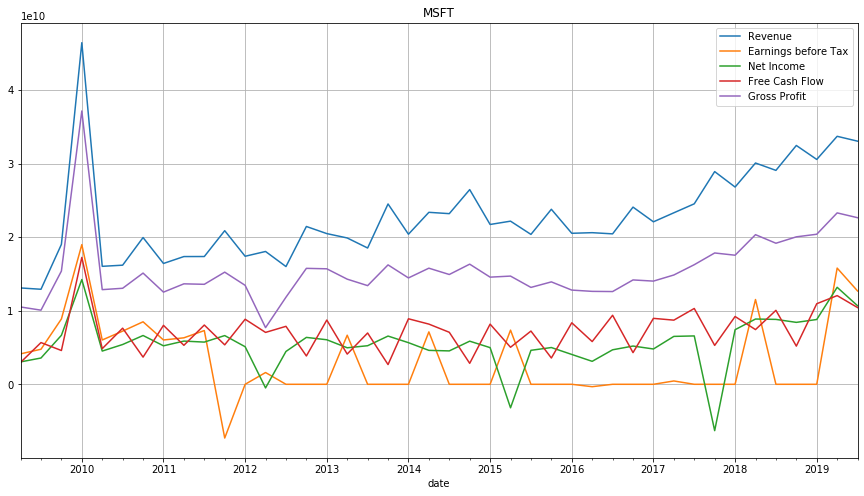

In [19]:
import pandas as pd

# Create a subset of columns in a DataFrame from the stock fundamentals dataset
cols = ['Revenue','Earnings before Tax','Net Income','Free Cash Flow margin','Gross Profit','Net Profit Margin'] # [ 'Shares', 'Price', 'Revenue', 'Earnings']
main_df1 = sd.MakeFund_Subset(main_df_org['income-statement'],cols)

# Create another subset of columns from another fundamentals dataset
cols = ['Number of Shares','Stock Price']
main_df2 = sd.MakeFund_Subset(main_df_org['enterprise-value'],cols)

# Create a 3rd subject of columns from yet another fundamentals dataset
cols = ['Capital Expenditure','Free Cash Flow']
main_df3 = sd.MakeFund_Subset(main_df_org['cash-flow-statement'],cols)

# Create a 4th subject of columns from yet another fundamentals dataset
cols = ['Free Cash Flow per Share']
main_df4 = sd.MakeFund_Subset(main_df_org['company-key-metrics'],cols)


# Merge the 3 dataframes into a single dataframe
main_df = pd.merge(main_df1,main_df2,on='date')
main_df = pd.merge(main_df,main_df3,on='date')
main_df = pd.merge(main_df,main_df4,on='date')

main_df.plot(y=['Revenue','Earnings before Tax','Net Income','Free Cash Flow','Gross Profit'],
             figsize=(15,8),title=sd.get_stock().upper()).grid()


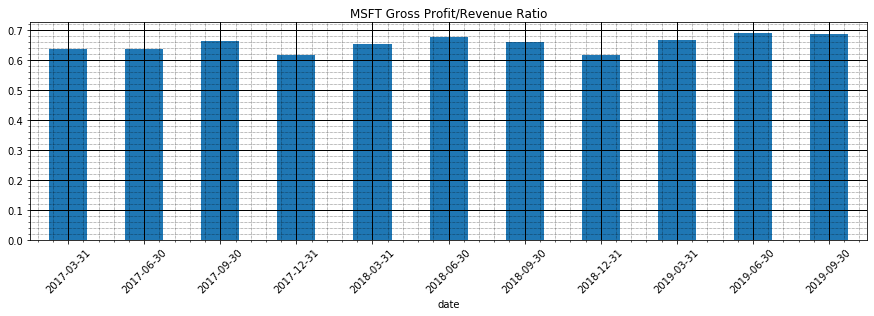

In [20]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

main_df = sd.DatesRange(main_df, '2017-01-01')
fig, ax = plt.subplots()
GrossOverRev_df = main_df['Gross Profit'] / main_df['Revenue']
ax = GrossOverRev_df.plot(ax=ax , kind='bar',
                          figsize=(15,4),
                          title=sd.get_stock().upper()+' Gross Profit/Revenue Ratio')

ax.xaxis.grid( which = 'minor')
ax.grid(True)

_=plt.xticks(rotation=45)

ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='major', linestyle='-', linewidth='1.0', color='black')
ax.yaxis.grid(which='major', linestyle='-', linewidth='1.0', color='black')

ticklabels = GrossOverRev_df.index.strftime('%Y-%m-%d')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
#ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))


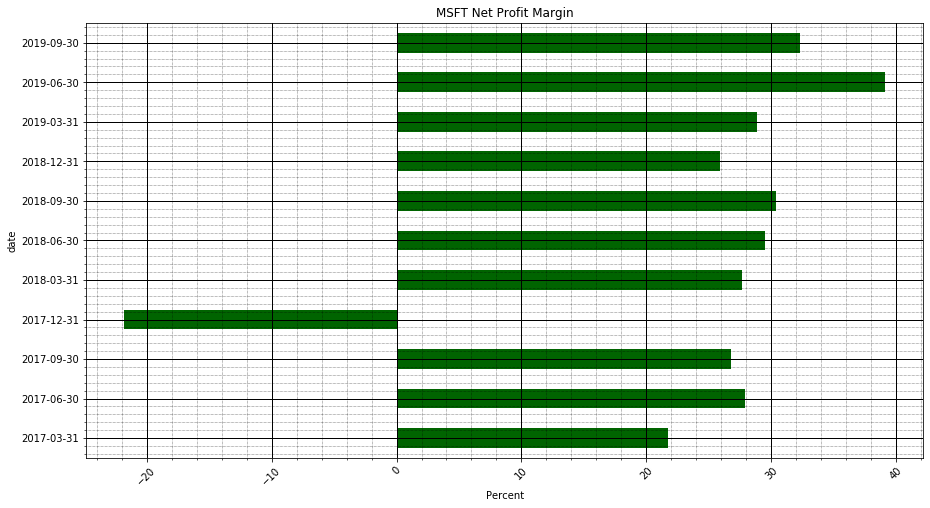

In [21]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots()
tmp_df = (main_df['Net Profit Margin'] * 100)
_=tmp_df.plot(ax=ax,y="Percent", kind='barh',figsize=(15,8),title=sd.get_stock().upper()+' Net Profit Margin',
              grid=True, color='darkgreen').set_xlabel('Percent')


ax.xaxis.grid( which = 'minor')
ax.grid(True)

_=plt.xticks(rotation=45)

ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='major', linestyle='-', linewidth='1.0', color='black')
ax.yaxis.grid(which='major', linestyle='-', linewidth='1.0', color='black')

ticklabels = tmp_df.index.strftime('%Y-%m-%d')
ax.yaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

# Using DatesRange() on fundamental data 

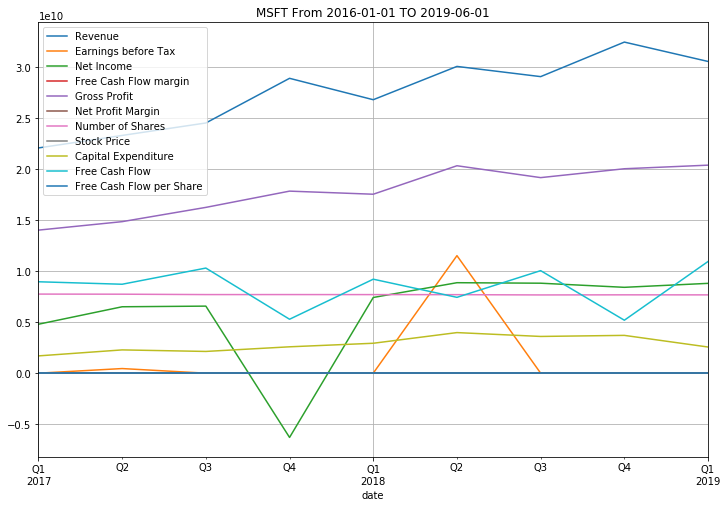

In [22]:
_=sd.DatesRange(main_df, '2016-01-01', '2019-06-01').plot(figsize=(12,8),
                                                                     grid=True,
                                                                     title=sd.get_stock().upper()+' From 2016-01-01 TO 2019-06-01')

<Figure size 1080x432 with 0 Axes>

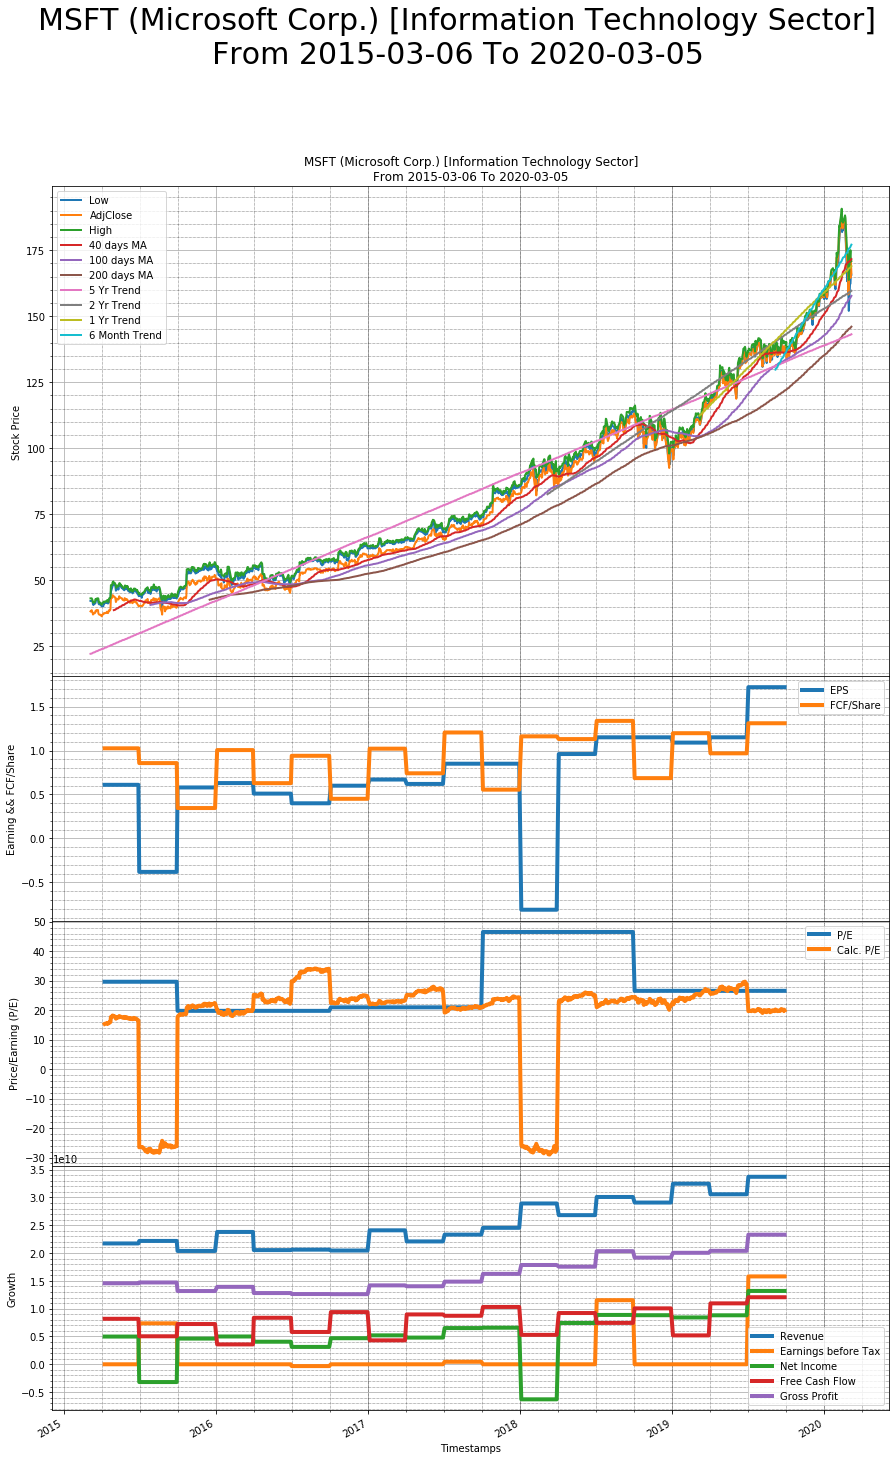

In [23]:
# Plot price chart with trend lines, EPS, and PE ratios
_=sd.plot_basic_charts('msft')

# Plot a single key stat item

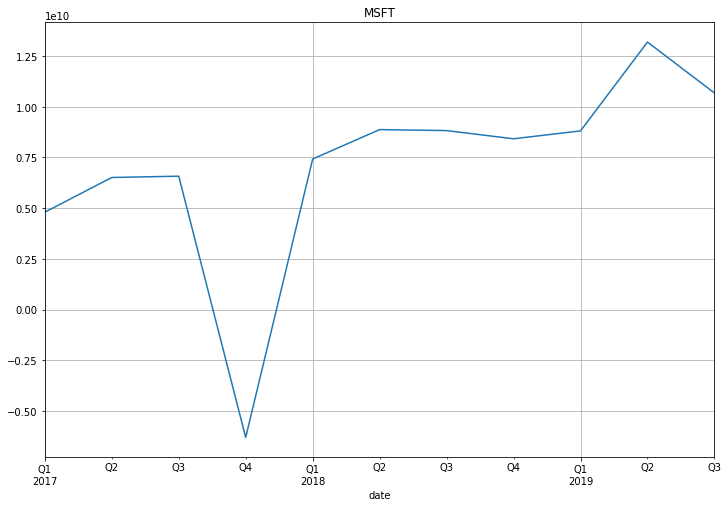

In [24]:
main_df['Net Income'].plot(figsize=(12,8), title = sd.get_stock().upper()).grid()

# Plot the TrendChart()

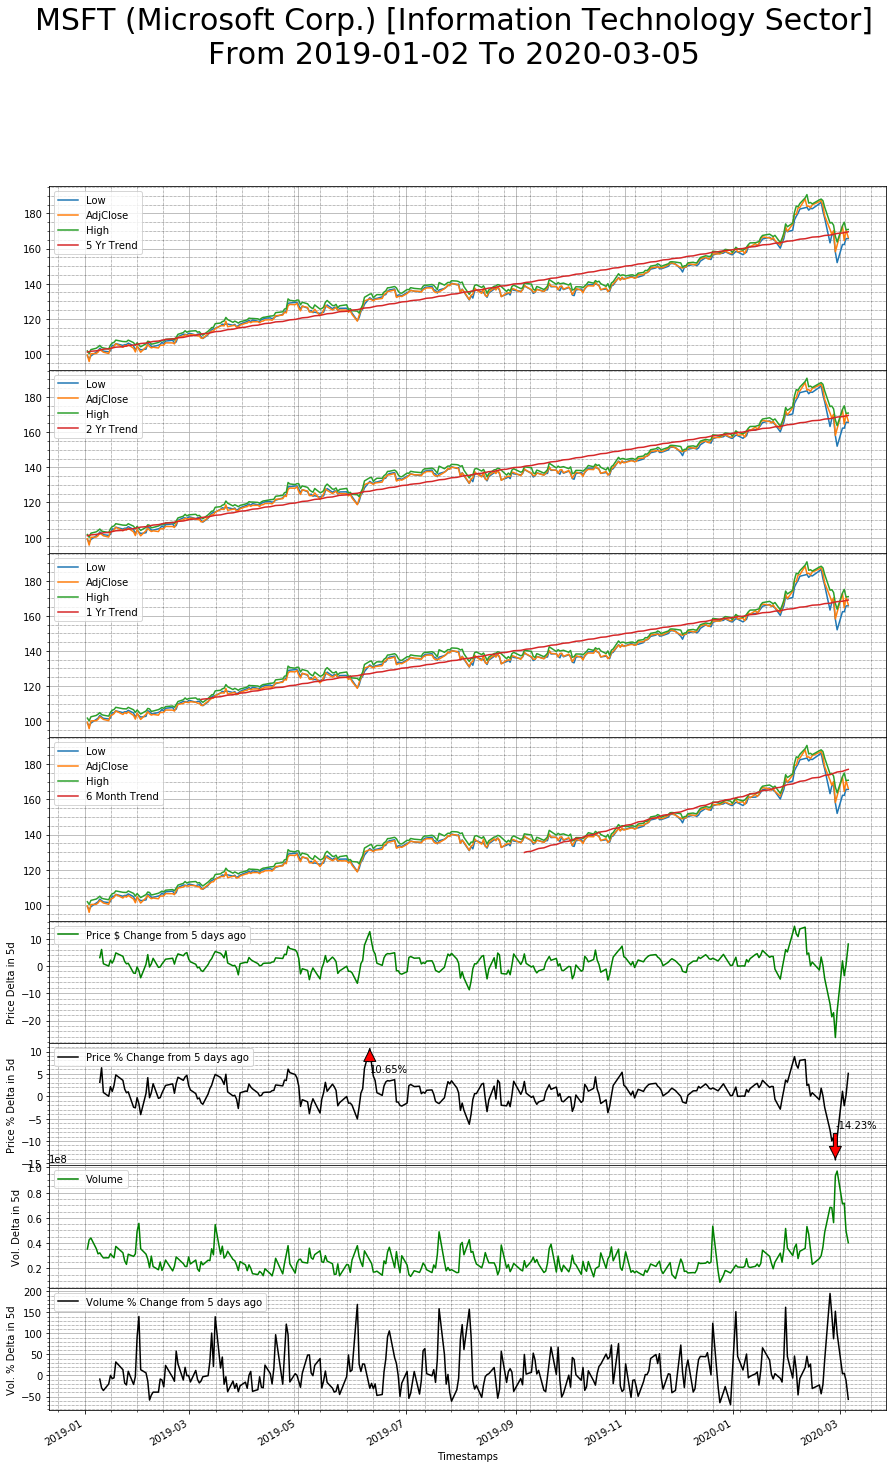

In [25]:
price_df = sd.GetStockDataFrame('msft')
price_df = sd.DatesRange(price_df, '2019-01-01')
price_data_df, maximums_table_df = sd.TrendsPlot('msft',price_df)

# Show the Maximums Table in price and volume

In [26]:
maximums_table_df

,Date,Price,Volume
Change Type,,,
Max % Rise,2019-06-10,10.65%,--
Max % Drop,2020-02-27,-14.23%,--
Max % Rise,2020-02-24,--,195.09%
Max % Drop,2019-12-30,--,-69.43%


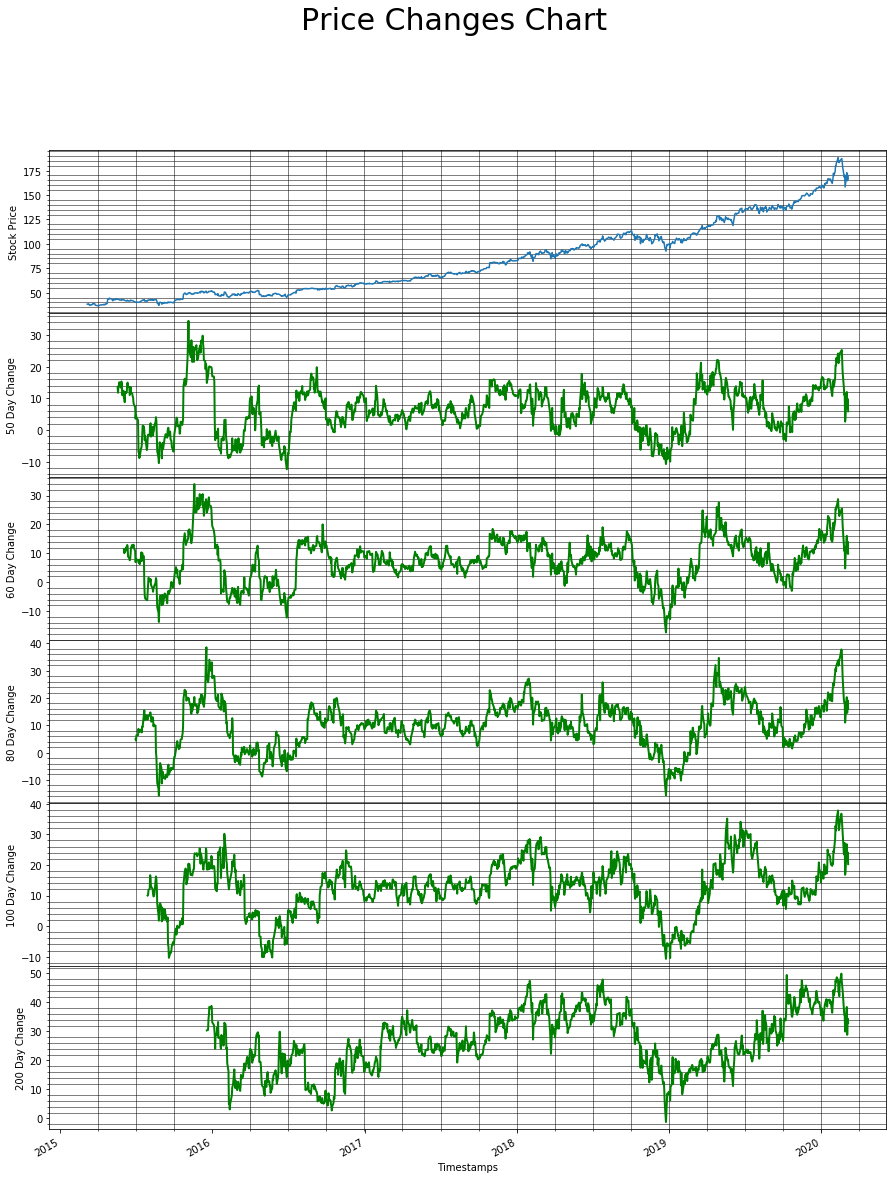

In [7]:
# Set the stock and get the prices dataframe
price_df = sd.GetStockDataFrame('msft')

# You can limit the range if needed
#price_df = sd.DatesRange(price_df, '2016-02-01')
   
sd.PlotPriceChanges(price_df,[50,60,80,100,200])

,Record Count,Mean of Price Change,Std. Dev of Price Change,Var of Price Change,Max. Price Rise,Max Price Drop
index,,,,,,
5,1254.0,0.637944,2.991526,8.949231,15.290800,-14.385443
10,1249.0,1.275649,3.882367,15.072776,18.031211,-14.129154
20,1239.0,2.649860,5.080776,25.814280,25.317623,-13.105544
50,1209.0,6.449645,7.391099,54.628350,34.420560,-12.365254
100,1159.0,12.734387,8.703237,75.746339,37.813585,-10.707142
200,1059.0,26.567929,10.109437,102.200707,49.901296,-1.272241
365,894.0,53.282529,12.624288,159.372654,81.677601,22.259506


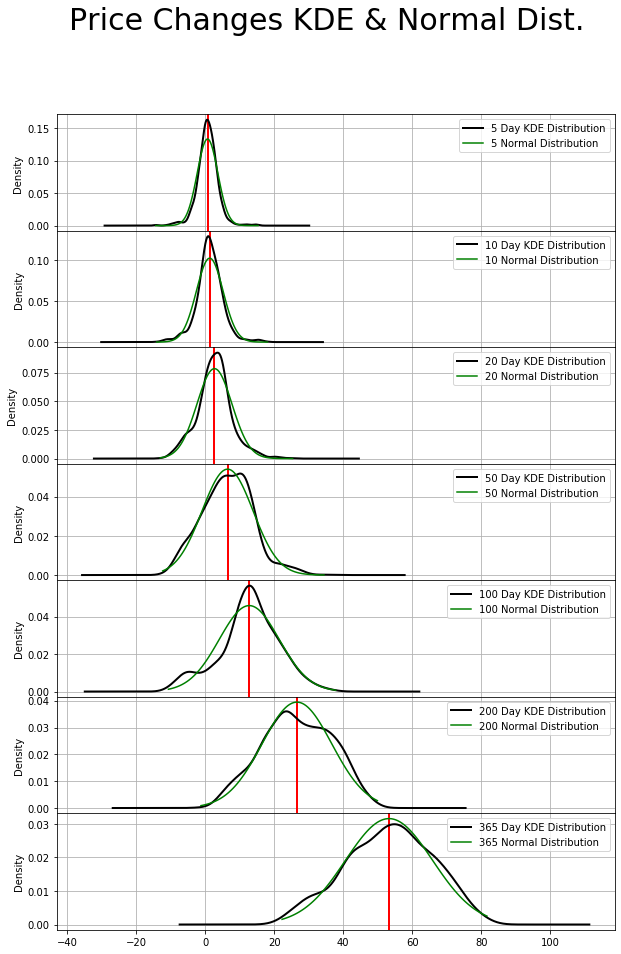

In [6]:
# Set the stock and get the prices dataframe
price_df = sd.GetStockDataFrame('msft')
price_changes, stats = sd.PlotPriceChangesKDE(price_df,[5,10,20,50,100,200,365])
stats

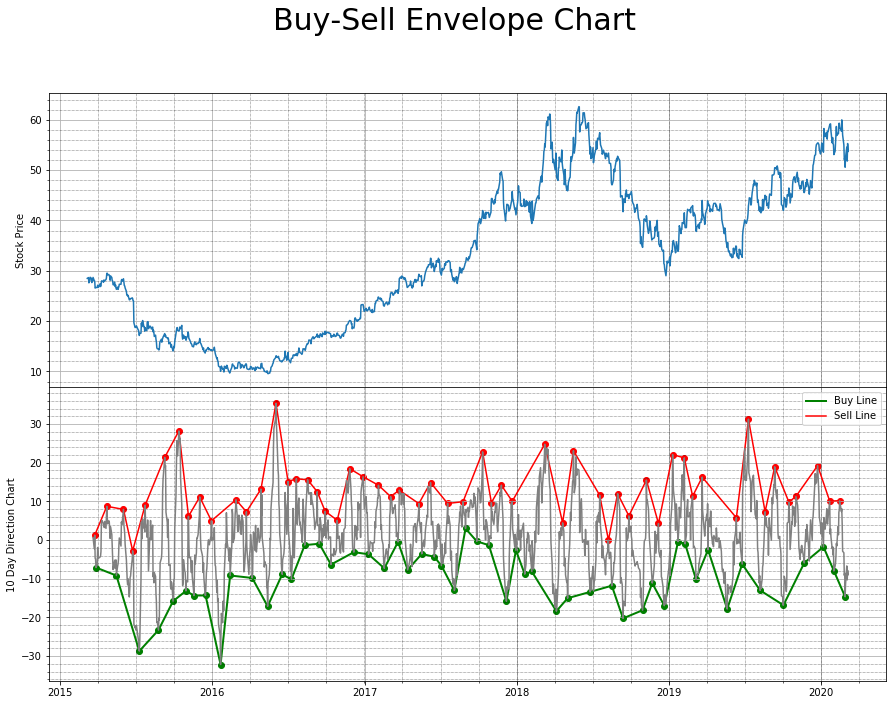

In [11]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

def XXXPlotBuySellEnvelope(price_df, period):   
    price_changes = sd.GetPriceChanges(price_df, [period])

    price_changes['data'] = price_changes[period].dropna().copy(deep=True)

    # Set the period
    n = period # number of points to be checked before and after 

    # Find local peaks
    price_changes['min'] = price_changes.iloc[argrelextrema(price_changes.data.values, 
                                                        np.less_equal, order=n)[0]]['data']
    price_changes['max'] = price_changes.iloc[argrelextrema(price_changes.data.values, 
                                                        np.greater_equal, order=n)[0]]['data']

    # Plot results
    fig, axs = plt.subplots(2,1,figsize=(15,12),sharex=True,gridspec_kw={'hspace': 0, 'wspace': 0})
    fig.suptitle("Buy-Sell Envelope Chart", fontsize=30)
    
    price_df['AdjClose'].plot(ax=axs[0]).grid(True)   
    axs[0].set_ylabel('Stock Price')

    # Plot the lower and upper envelop
    price_minima = pd.DataFrame(price_changes['min'].dropna()).copy(deep=True)
    plt.plot(price_minima,c='green',label='Buy Line',lw=2.0)

    price_maxima = pd.DataFrame(price_changes['max'].dropna()).copy(deep=True)
    plt.plot(price_maxima,c='red', label='Sell Line')
    ###############################

    plt.scatter(price_changes.index, price_changes['min'], color='green')
    plt.scatter(price_changes.index, price_changes['max'], color='red')
    plt.plot(price_changes.index, price_changes['data'],c='gray')
    plt.grid(which='major',axis='both')
    axs[1].set_ylabel(str(n)+' Day Direction Chart')
    axs[1].legend()

    for ax in axs:
        ax.label_outer()
        ax.minorticks_on()
        ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

    plt.show()
    
##################################################

price_df = sd.GetStockDataFrame('mu')
sd.PlotBuySellEnvelope(price_df, 10)


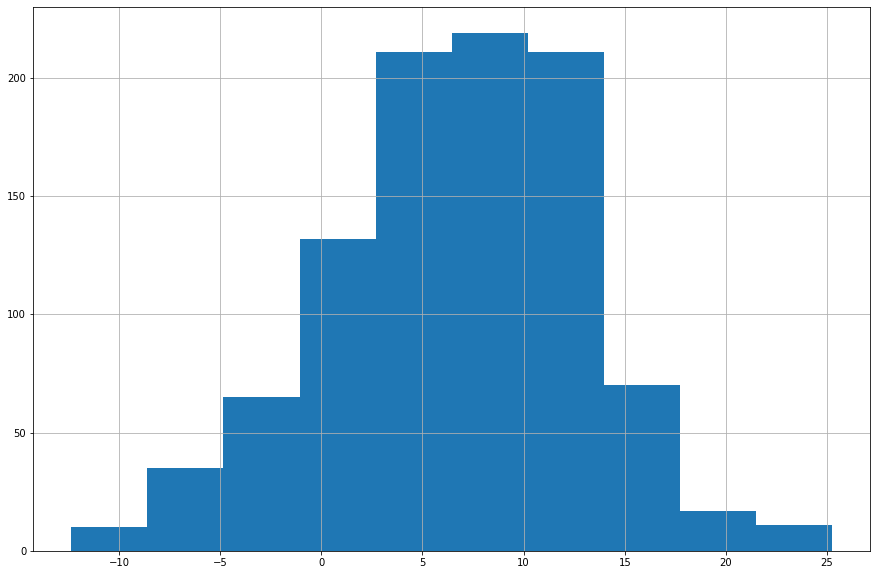

In [42]:
price_changes100.hist(figsize=(15,10))

# Search for a column containing 'cash flow' substring

In [28]:
f,s = sd.FindColumn('cash flow')
f

,column_name,DataFrame
0,Free Cash Flow margin,income-statement
1,Operating Cash Flow,cash-flow-statement
2,Investing Cash flow,cash-flow-statement
3,Financing Cash Flow,cash-flow-statement
4,Net cash flow / Change in cash,cash-flow-statement
5,Free Cash Flow,cash-flow-statement
6,Operating Cash Flow per Share,company-key-metrics
7,Free Cash Flow per Share,company-key-metrics
8,EV to Operating cash flow,company-key-metrics
9,EV to Free cash flow,company-key-metrics


In [29]:
fcfy_df = main_df_org['company-key-metrics']['Free Cash Flow Yield']

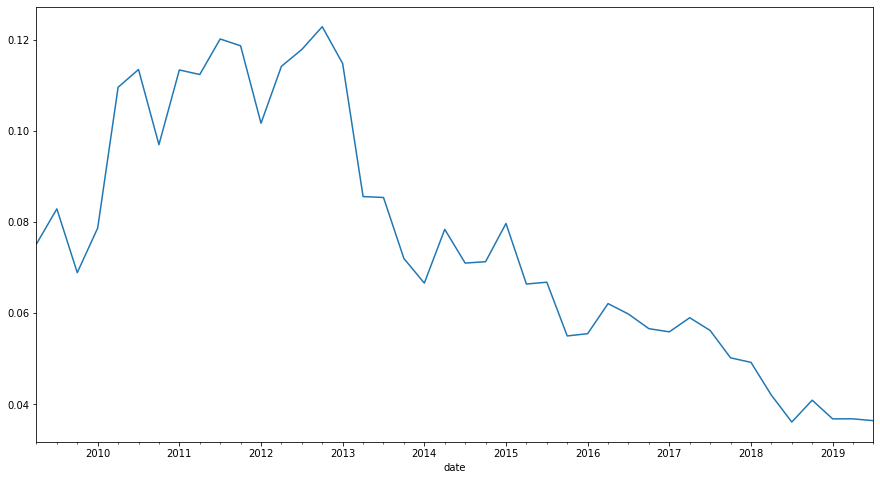

In [30]:
fcfy_df.plot(figsize=(15,8))

In [31]:
import time
def print_over(txt):
    print('\r',end='')
    print(txt,end='')
    
r,c,stocks = sd.GetSP500_List()
for s in stocks['Symbol']:
    print_over(s)
    time.sleep(0.1)
    


ZTSNL

In [35]:
r,c,stocks = sd.GetSP500_List()
stocks
for s in stocks['Symbol']:
    print_over(s)

ZTS

In [143]:
import sys
import inspect
current_module = sys.modules[__name__]

def print_classes(mod):
    for name, obj in inspect.getmembers(sys.modules[mod]):
        if inspect.isclass(obj):
            print(name,obj)

print_classes('matplotlib')           

#inspect.getmembers(sys.modules['matplotlib'])
#dir(matplotlib.pyplot)

LooseVersion <class 'distutils.version.LooseVersion'>
MatplotlibDeprecationWarning <class 'matplotlib.cbook.deprecation.MatplotlibDeprecationWarning'>
MutableMapping <class 'collections.abc.MutableMapping'>
Parameter <class 'inspect.Parameter'>
Path <class 'pathlib.Path'>
RcParams <class 'matplotlib.RcParams'>
_ExecInfo <class 'matplotlib._ExecInfo'>
mplDeprecation <class 'matplotlib.cbook.deprecation.MatplotlibDeprecationWarning'>
rc_context <class 'matplotlib.rc_context'>


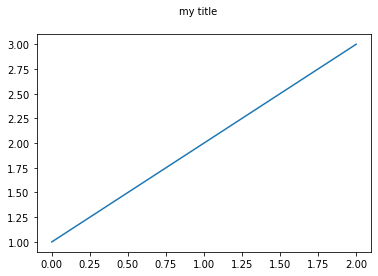

In [122]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure


class MyFigure(Figure):
    def __init__(self, *args, figtitle='hi mom', **kwargs):
        """
        custom kwarg figtitle is a figure title
        """
        super().__init__(*args, **kwargs)
        self.text(0.5, 0.95, figtitle, ha='center')


fig = plt.figure(FigureClass=MyFigure, figtitle='my title')
ax = fig.subplots()
ax.plot([1, 2, 3])

plt.show()

In [87]:
class Animal:
    def __init__(self, Name=", Age=0, Type="):
        self.Name = Name
        self.Age = Age
        self.Type = Type
    def GetName(self):
        return self.Name
    def SetName(self, Name):
        self.Name = Name
    def GetAge(self):
        return self.Age
    def SetAge(self, Age):
        self.Age = Age
    def GetType(self):
        return self.Type
    def SetType(self, Type):
        self.Type = Type
    def __str__(self):
        return "{0} is a {1} aged {2}".format(self.Name,self.Type,self.Age)
    
class Chicken(Animal):
    def __init__(self, Name='', Age=0):
        self.Name = Name
        self.Age = Age
        self.Type = "Chicken"
    def SetType(self, Type):
        print("Sorry, {0} will always be a {1}".format(self.Name, self.Type))
    def MakeSound(self):
        print("{0} says Cluck, Cluck, Cluck!".format(self.Name))

In [89]:
an = Chicken()
an.SetType('banana')

Sorry,  will always be a Chicken


In [129]:
import matplotlib.pyplot as plt
from matplotlib import pyplot


class MyPlot(plt):
    def __init__(self):
        super().__init__()
        self.plot([(1,2)])


fig = plt.plot(figtitle='my title')
ax = fig.subplots()
ax.plot([1, 2, 3])

plt.show()

TypeError: module() takes at most 2 arguments (3 given)